In [1]:
import numpy as np
import pandas as pd

import torch
from torch.utils.data import Dataset

import zarr
import matplotlib.pyplot as plt
import numcodecs

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2
from zarr_dataset import Zarr_Dataset

In [4]:
BUCKET_NAME = 'datasets-sdm2'
folder = 'geoLifeCLEF/features'
# s3://datasets-sdm2/geoLifeCLEF/features/
filename_train = 'train_ca.zarr'
filename_val   = 'val_ca.zarr'
s3_train_path  = 's3://{}/{}/{}'.format(BUCKET_NAME, folder, filename_train)
s3_val_path    = 's3://{}/{}/{}'.format(BUCKET_NAME, folder, filename_val)
local_val_path = 'data/val_ca.zarr'
local_train_path = 'data/train_ca.zarr'
s3_example_path = 's3://{}/{}/example.zarr'.format(BUCKET_NAME, folder)
print(s3_train_path, s3_val_path, s3_example_path, local_val_path, local_train_path)

s3://datasets-sdm2/geoLifeCLEF/features/train_ca.zarr s3://datasets-sdm2/geoLifeCLEF/features/val_ca.zarr s3://datasets-sdm2/geoLifeCLEF/features/example.zarr data/val_ca.zarr data/train_ca.zarr


In [5]:
# test_dataset = Zarr_Dataset('../data/example.zarr')
train_dataset = Zarr_Dataset(s3_val_path)

In [11]:
patch, target = train_dataset[2708]

[Completed Extraction]: 2708


In [12]:
patch.shape, patch.dtype, target.shape, target.dtype

(torch.Size([31, 64, 64]), torch.float32, torch.Size([5079]), torch.float32)

In [13]:
target.sum()

tensor(91.2078)

In [14]:
patch.min(), patch.max()

(tensor(0.), tensor(0.8237))

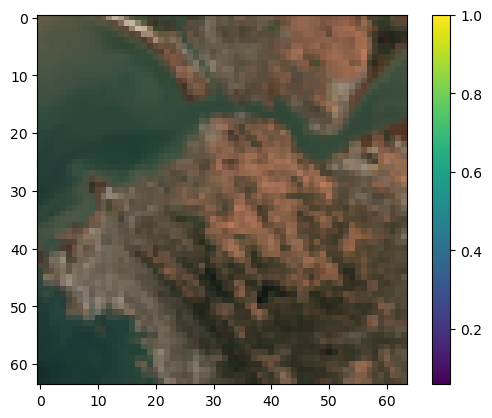

In [15]:
img = patch[0:3,:,:]
img = img.numpy()
img = img.transpose([1, 2, 0])
plt.imshow(img, vmax=1)
plt.colorbar()
plt.show()

(tensor(0.5543), tensor(0.))

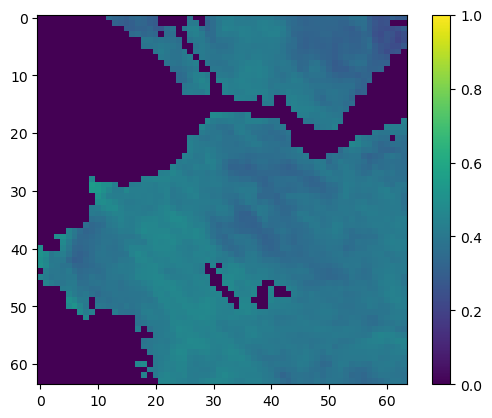

In [16]:
ped = patch[-1].unsqueeze(dim=0)#-> Remove first dim (channel) 
plt.imshow(ped.permute(1, 2, 0),vmax=1)#, vmax=1.0)
plt.colorbar()
patch[-1].max(), patch[-1].min()

In [21]:
train_dataset.data.info

Type,zarr.core.Array
Data type,object
Shape,"(17173, 2)"
Chunk shape,"(10, 2)"
Order,C
Read-only,True
Filter [0],Pickle(protocol=5)
Compressor,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)"
Store type,zarr.storage.FSStore
No. bytes,274768 (268.3K)
No. bytes stored,13232467047 (12.3G)


In [20]:
len(train_dataset)

17173

In [27]:
BUCKET_NAME = 'datasets-sdm2'
folder = 'geoLifeCLEF/features'
# s3://datasets-sdm2/geoLifeCLEF/features/
filename = 'train_ca.zarr'
# filename = 'val_ca.zarr'
s3_feature_path = 's3://{}/{}/{}'.format(BUCKET_NAME, folder, filename)
print(s3_feature_path)

s3://datasets-sdm2/geoLifeCLEF/features/train_ca.zarr


In [5]:
v = zarr.open(s3_val_path, mode='r')

In [6]:
v.info

Type,zarr.core.Array
Data type,object
Shape,"(5025, 2)"
Chunk shape,"(1, 2)"
Order,C
Read-only,True
Filter [0],Pickle(protocol=5)
Compressor,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)"
Store type,zarr.storage.FSStore
No. bytes,80400 (78.5K)
No. bytes stored,3228274176 (3.0G)


In [34]:
xx = v[-1]

In [35]:
xx[0].shape, xx[1].shape

((31, 64, 64), (5079,))

In [8]:
xx[0].dtype

dtype('float64')

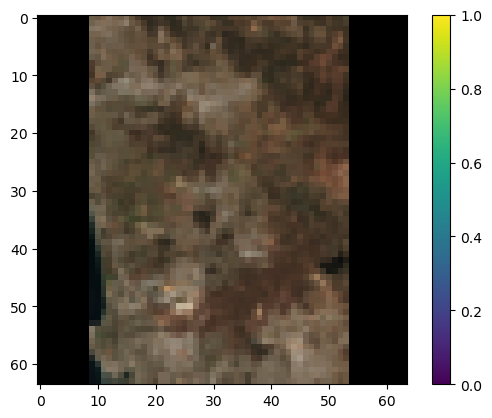

In [13]:
img = v[-200][0][0:3,:,:]
img = img.transpose([1, 2, 0])
plt.imshow(img, vmax=1)
plt.colorbar()
plt.show()

In [10]:
example = zarr.open('../data/example.zarr/', mode='rw')

In [22]:
example.info

Type,zarr.core.Array
Data type,object
Shape,"(17173, 2)"
Chunk shape,"(10, 2)"
Order,C
Read-only,False
Filter [0],Pickle(protocol=5)
Compressor,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)"
Store type,zarr.storage.DirectoryStore
No. bytes,274768 (268.3K)
No. bytes stored,6648622 (6.3M)


In [8]:
import numcodecs

In [20]:
example_copy = zarr.open('../data/example_copy.zarr', mode='w', shape=(100,2), \
                    chunks=(1,None), dtype=object, object_codec=numcodecs.Pickle())

In [21]:
example_copy.info

Type,zarr.core.Array
Data type,object
Shape,"(100, 2)"
Chunk shape,"(1, 2)"
Order,C
Read-only,False
Filter [0],Pickle(protocol=5)
Compressor,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)"
Store type,zarr.storage.DirectoryStore
No. bytes,1600 (1.6K)
No. bytes stored,409


In [17]:
BUCKET_NAME = 'datasets-sdm2'
folder = 'geoLifeCLEF/features'
# s3://datasets-sdm2/geoLifeCLEF/features/
filename = 'example.zarr'
# filename = 'val_ca.zarr'
s3_feature_path = 's3://{}/{}/{}'.format(BUCKET_NAME, folder, filename)
print(s3_feature_path)

s3://datasets-sdm2/geoLifeCLEF/features/example.zarr


In [13]:
example = zarr.open('../data/example.zarr/', mode='w', shape=(100,2), \
                    chunks=(1,None), dtype=object, object_codec=numcodecs.Pickle())

In [14]:
example.info

Type,zarr.core.Array
Data type,object
Shape,"(100, 2)"
Chunk shape,"(1, 2)"
Order,C
Read-only,False
Filter [0],Pickle(protocol=5)
Compressor,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)"
Store type,zarr.storage.DirectoryStore
No. bytes,1600 (1.6K)
No. bytes stored,409


In [15]:
from tqdm.notebook import tqdm

# for i in tqdm(range(int(len(train_set)/BATCH_SIZE + 0.5))):
for i in tqdm(range(100)):
    test_p = np.arange(31*64*64).reshape(31,64,64)
    test_t = np.arange(5079)
    example[i] = (test_p,test_t)

  0%|          | 0/100 [00:00<?, ?it/s]

In [16]:
example.info

Type,zarr.core.Array
Data type,object
Shape,"(100, 2)"
Chunk shape,"(1, 2)"
Order,C
Read-only,False
Filter [0],Pickle(protocol=5)
Compressor,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)"
Store type,zarr.storage.DirectoryStore
No. bytes,1600 (1.6K)
No. bytes stored,52929409 (50.5M)


In [26]:
example = zarr.open('../data/example.zarr/', mode='w', shape=(100,2), \
                    chunks=(1,None), dtype=object, object_codec=numcodecs.Pickle())
example.info

Type,zarr.core.Array
Data type,object
Shape,"(100, 2)"
Chunk shape,"(1, 2)"
Order,C
Read-only,False
Filter [0],Pickle(protocol=5)
Compressor,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)"
Store type,zarr.storage.DirectoryStore
No. bytes,1600 (1.6K)
No. bytes stored,409


In [17]:
from tqdm.notebook import tqdm

In [18]:
for i in tqdm(range(100)):
    test_p = np.arange(31*64*64).reshape(31,64,64)
    test_t = np.arange(5079)
    example[i] = (test_p,test_t)

  0%|          | 0/100 [00:00<?, ?it/s]

/srv/conda/envs/notebook/lib/python3.9/site-packages/zarr/core.py:1775: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  value = np.asanyarray(value)


In [19]:
example.info

Type,zarr.core.Array
Data type,object
Shape,"(100, 2)"
Chunk shape,"(10, 2)"
Order,C
Read-only,False
Filter [0],Pickle(protocol=5)
Compressor,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)"
Store type,zarr.storage.DirectoryStore
No. bytes,1600 (1.6K)
No. bytes stored,51508940 (49.1M)


In [24]:
example[-1][0].shape

(31, 64, 64)

In [24]:
## Try to load it into memory

In [4]:
import xarray as xr
import fsspec
import s3fs
import zarr

In [5]:
url = 's3://datasets-sdm2/geoLifeCLEF/example.zarr/'
# fs = s3fs.S3FileSystem(anon=False)
# store = zarr.open(s3fs.S3Map(url, s3=fs))

In [6]:
store = zarr.DirectoryStore('s3://datasets-sdm2/geoLifeCLEF/example.zarr/')
g = zarr.group(store=store, overwrite=True)
g

<zarr.hierarchy.Group '/'>

In [55]:
from tqdm.notebook import tqdm

In [57]:
for i in tqdm(range(100)):
    test_p = np.arange(31*64*64).reshape(31,64,64)
    # test_t = np.arange(5079)
    g[i] = test_p

  0%|          | 0/100 [00:00<?, ?it/s]

In [7]:
g.info


Name,/
Type,zarr.hierarchy.Group
Read-only,False
Store type,zarr.storage.DirectoryStore
No. members,0
No. arrays,0
No. groups,0


In [8]:
g[99][:][:].shape

KeyError: 99

In [110]:
g.read_only 

False

In [9]:
store = zarr.DirectoryStore('s3://datasets-sdm2/geoLifeCLEF/example.zarr/')
example = zarr.group(store=store, overwrite=False)
example.info

Name,/
Type,zarr.hierarchy.Group
Read-only,False
Store type,zarr.storage.DirectoryStore
No. members,0
No. arrays,0
No. groups,0


In [17]:
root = zarr.open('s3://datasets-sdm2/geoLifeCLEF/example.zarr/', mode='r')

In [20]:
import xarray as xr
zarr_ds = xr.open_zarr(store='s3://datasets-sdm2/geoLifeCLEF/', consolidated=True)

KeyError: '.zmetadata'

In [10]:
r

0

In [88]:
x = np.array(example[0])
x.shape

(31, 64, 64)

In [105]:
store.close()

In [106]:
example[1]

<zarr.core.Array '/1' (31, 64, 64) int64>

In [7]:
import gc
del example_mem
gc.collect()

523

In [5]:
example = zarr.open('s3://datasets-sdm2/geoLifeCLEF/features/val_ca.zarr', mode='rw')
# example = zarr.open('s3://datasets-sdm2/geoLifeCLEF/features/train_ca_features.zarr', mode='r')
example.info

Type,zarr.core.Array
Data type,object
Shape,"(5025, 2)"
Chunk shape,"(1, 2)"
Order,C
Read-only,False
Filter [0],Pickle(protocol=5)
Compressor,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)"
Store type,zarr.storage.FSStore
No. bytes,80400 (78.5K)
No. bytes stored,3228274176 (3.0G)


In [6]:
example.resize(4964,2)

In [7]:
example.info

Type,zarr.core.Array
Data type,object
Shape,"(4964, 2)"
Chunk shape,"(1, 2)"
Order,C
Read-only,False
Filter [0],Pickle(protocol=5)
Compressor,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)"
Store type,zarr.storage.FSStore
No. bytes,79424 (77.6K)
No. bytes stored,3228274176 (3.0G)


In [10]:
example[-1][1].shape

(5079,)